In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


# Preprocessing

In [4]:
df.shape

(100, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [6]:
df.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [7]:
df = df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# EDA

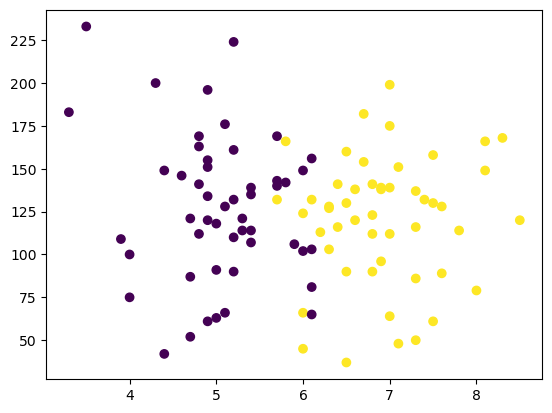

In [9]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [10]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [11]:
X.shape

(100, 2)

In [12]:
y.shape

(100,)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Model Training

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf = LogisticRegression()

In [17]:
clf.fit(X_train,y_train)
clf

LogisticRegression()

In [18]:
y_pred = clf.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test,y_pred)

0.5

In [21]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

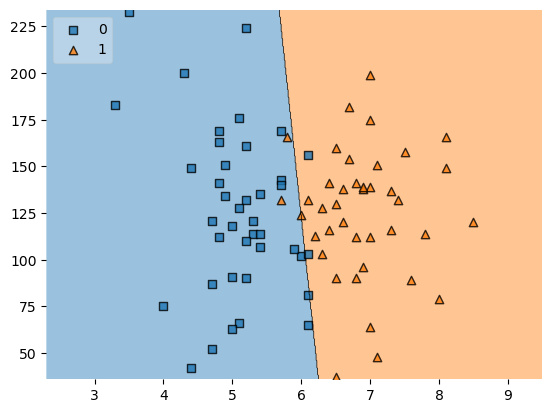

In [22]:
plot_decision_regions(X_train.values, y_train.values, clf=clf, legend=2)

In [23]:
import pickle

In [24]:
pickle.dump(clf,open('model.pkl','wb'))